#**Private versus Public?: Classifying NYC Colleges' Incident Reports Through Decision Trees and KNN Models**\
##Navpreet Kaur and Emily Yih

###Abstract:
<p> In this project, various New York City's colleges' 2020 annual security reports were analyzed to extract the 2019 incident report statistics and to attempt to classify the type of institution these crimes are committed in: public, or private. Three models were built to classify the data and compared against each other in terms of accuracy, precision, and recall. Two models were decision trees, using Gini and entropy to decide what attributes to split on, and the third model was a KNN model using the nearest neighbor algorithm. In the end, it was determined that the decision tree using entropy was the best model for the dataset, with the decision tree using Gini being the least effective.</p>

###Introduction:
<p>Crime is something that happens in all parts of New York City and at all types of schools, and it is essential to reorganize the crime immediately and take preventative measures. Therefore, the goal of this project is to build and compare multiple models to classify the type of school where each crime was committed: public school or private school. All colleges and universities have to create and share their annual security report where they share the school's crime statistics from the past years, so by looking at the reports of various schools located throughout New York City, a data set of 525 examples was organized.</p>
<p>Two of the models built utilized a classification technique of decision trees. Decision tree classifiers have a tree-like structure, where the root is on top and it grows downwards. There are multiple decision trees within this project that represent the data presented, but these models will be compared to each other in terms of the size and comprehensibility of each tree. Tree models can be built differently depending on the splitting of the attributes. Therefore, the first model was built based on the Gini, so the attributes split on were decided by whichever one produced the lowest Gini score. Another model built in the project was the entropy model, so the best feature to split on was identified by the entropy after the split. The best feature to split on will produce the smallest entropy value, similar to Gini. Aside from the size and comprehensibility of each decision tree, they can also be assessed and compared with respect to their accuracy, precision, and recall values. The last model, a KNN model, used the nearest neighbor algorithm, which uses the closest points to perform classification. This type of model presents different advantages from the decision trees: extremely expressive, and robust to noise; however it is sensitive to irrelevant and redundant features, unlike decision trees.</p>

###Experiment Methodology:
<p> The dataset we gathered consisted of 25 colleges/universities across NYC in all 5 boroughs [Queens: Queens College, St. John's University, LaGuardia Community College, York College, Plaza College, Queensborough Community College; Manhattan: Fordham University Lincoln Center, Baruch College, Columbia University, NYU, Pace University, NYIT; Brooklyn: Brooklyn College, Pratt Institute, New Your City College of Technology, NYU Tandon, LIU, Kingsborough Community College; Bronx: Fordham University Rose Hill, Lehman College, Bronx Community College, Manhattan College; Staten Island: College of Staten Island, Wagner College, St. John's University]. From each college, we collected data from 2019 regarding the incidents that were reported on campus, in residence halls, on non-campus property, and on public property. The types of incidents that were reported were also identified. The incidents consisted of aggravated assault, arson, burglary, motor vehicle theft, murder/non-negligent manslaughter, manslaughter by negligence, robbery, rape, fondling, incest, statutory rape, domestic violence, dating violence, stalking, drug abuse, violations arrest, liquor law violations arrest, weapons possession arrest, unfounded crime, drug abuse violations(referral), liquor law violations(referral), and weapons possession(referral). We also noted whether or not these colleges/universities were public or private, since this is what we would assign as the class of the dataset.</p>

In [1]:
#View the data collected
import pandas as pd

df = pd.read_csv("incident_report2019_data.csv")
print(df)

                             college_name   location  num_location  \
0    Fordham University at Lincoln Center  Manhattan             0   
1    Fordham University at Lincoln Center  Manhattan             0   
2    Fordham University at Lincoln Center  Manhattan             0   
3    Fordham University at Lincoln Center  Manhattan             0   
4    Fordham University at Lincoln Center  Manhattan             0   
..                                    ...        ...           ...   
520       Queensborough Community College     Queens             4   
521       Queensborough Community College     Queens             4   
522       Queensborough Community College     Queens             4   
523       Queensborough Community College     Queens             4   
524       Queensborough Community College     Queens             4   

    type_of_university  num_type_of_university  length_of_college_in_years  \
0              Private                       0                           4   
1  

<p>There were also some non-numerical values which we later changed to numerical values so that we can implement them into the python decision tree algorithm. The dataset also included a lot of values that were reported as '0', which was a bit of a concern. Some schools do not have residence halls, so there were also missing data points, those values were replaced with 0's. DUe to time constraints, we were only able to gather data from 25 schools, but if we further explore this topic, we would like to increase that number and gather more data that could be useful</p>
<p>We also produced some scatter plots on Weka to get a better understanding of the dataset and identify any patterns, outliers, and etc. Below is an example of some of the models from the scatter plots produced.</p>
<img src = "scatter_plots.jpg">
<p>Using the dataset and the type of university as the class, we used classification algorithms to first build decision tree models and obtain the accuracy and confusion matrix for each of the models. Then, we chose to use a KNN model to see whether that was a better classifier. Three different models were used: 2 decision tree models and 1 nearest-neighbor model. For all 3 models, we used accuracy, precision, and recall as the measures to analyze the different models and understand what information they tell us about the model.</p>
<p>The first decision tree used the default python settings, where the decision tree was based on Gini. We played around with the cross-validation and for the final model that we will discuss in the next section, we used 50-fold cross-validation, this made the test set 2% of the examples. There was no pruning in this model, so max_depth was default set to none which would lead to overfitting. We then calculate the test accuracy to determine the best model for the test data. This step was done for all three models.</p>

Accuracy:  0.6363636363636364
[[6 3]
 [1 1]]


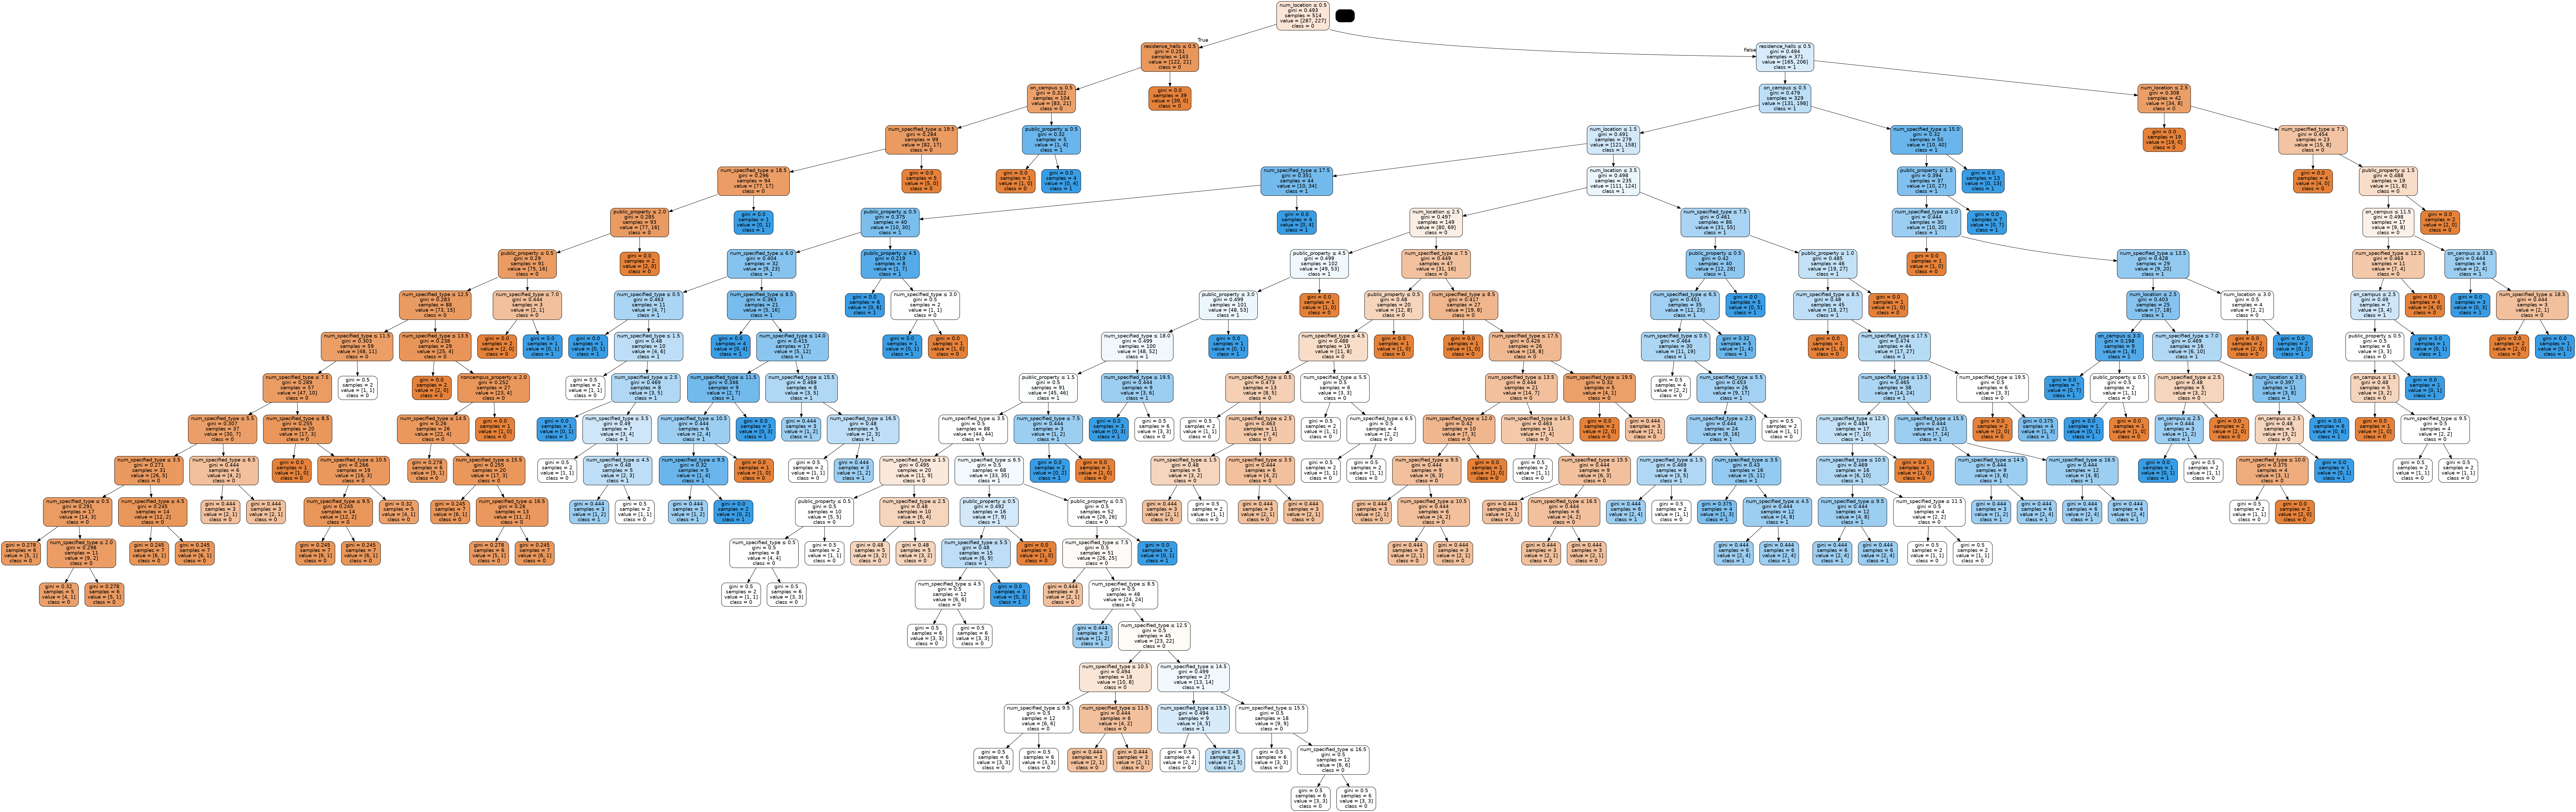

In [2]:
#Decision Tree #1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz 
from sklearn.tree import export_text

#Feature selection: want a dependent variable and independent variable
features = ['num_location','num_specified_type','on_campus','residence_halls',
'noncampus_property','public_property']

X = df[features]
y = df.num_type_of_university #Target variable

#Split the data into training sets and test sets
#By cross_validation, we will do a 50 fold cross validation, so training 98% of the data
# and test on 2%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02,
random_state=1)

model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

#Print the confusion matrix so that we get a better understanding
conf_matrix = confusion_matrix(y_pred, y_test)
print(conf_matrix)

#Draw the decision Tree
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features,
class_names=['0','1'])
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
graph.write_png('typemodel1.png')
Image(graph.create_png())

<p>For the second decision tree model we changed the decision tree classifier so that now it was based on entropy and applied pruning by changing the max_depth to 5 to overcome the problem of overfitting. Now there were a lot less leaf nodes in comparison to the first decision tree model.</p>

Accuracy:  0.8181818181818182
[[6 1]
 [1 3]]


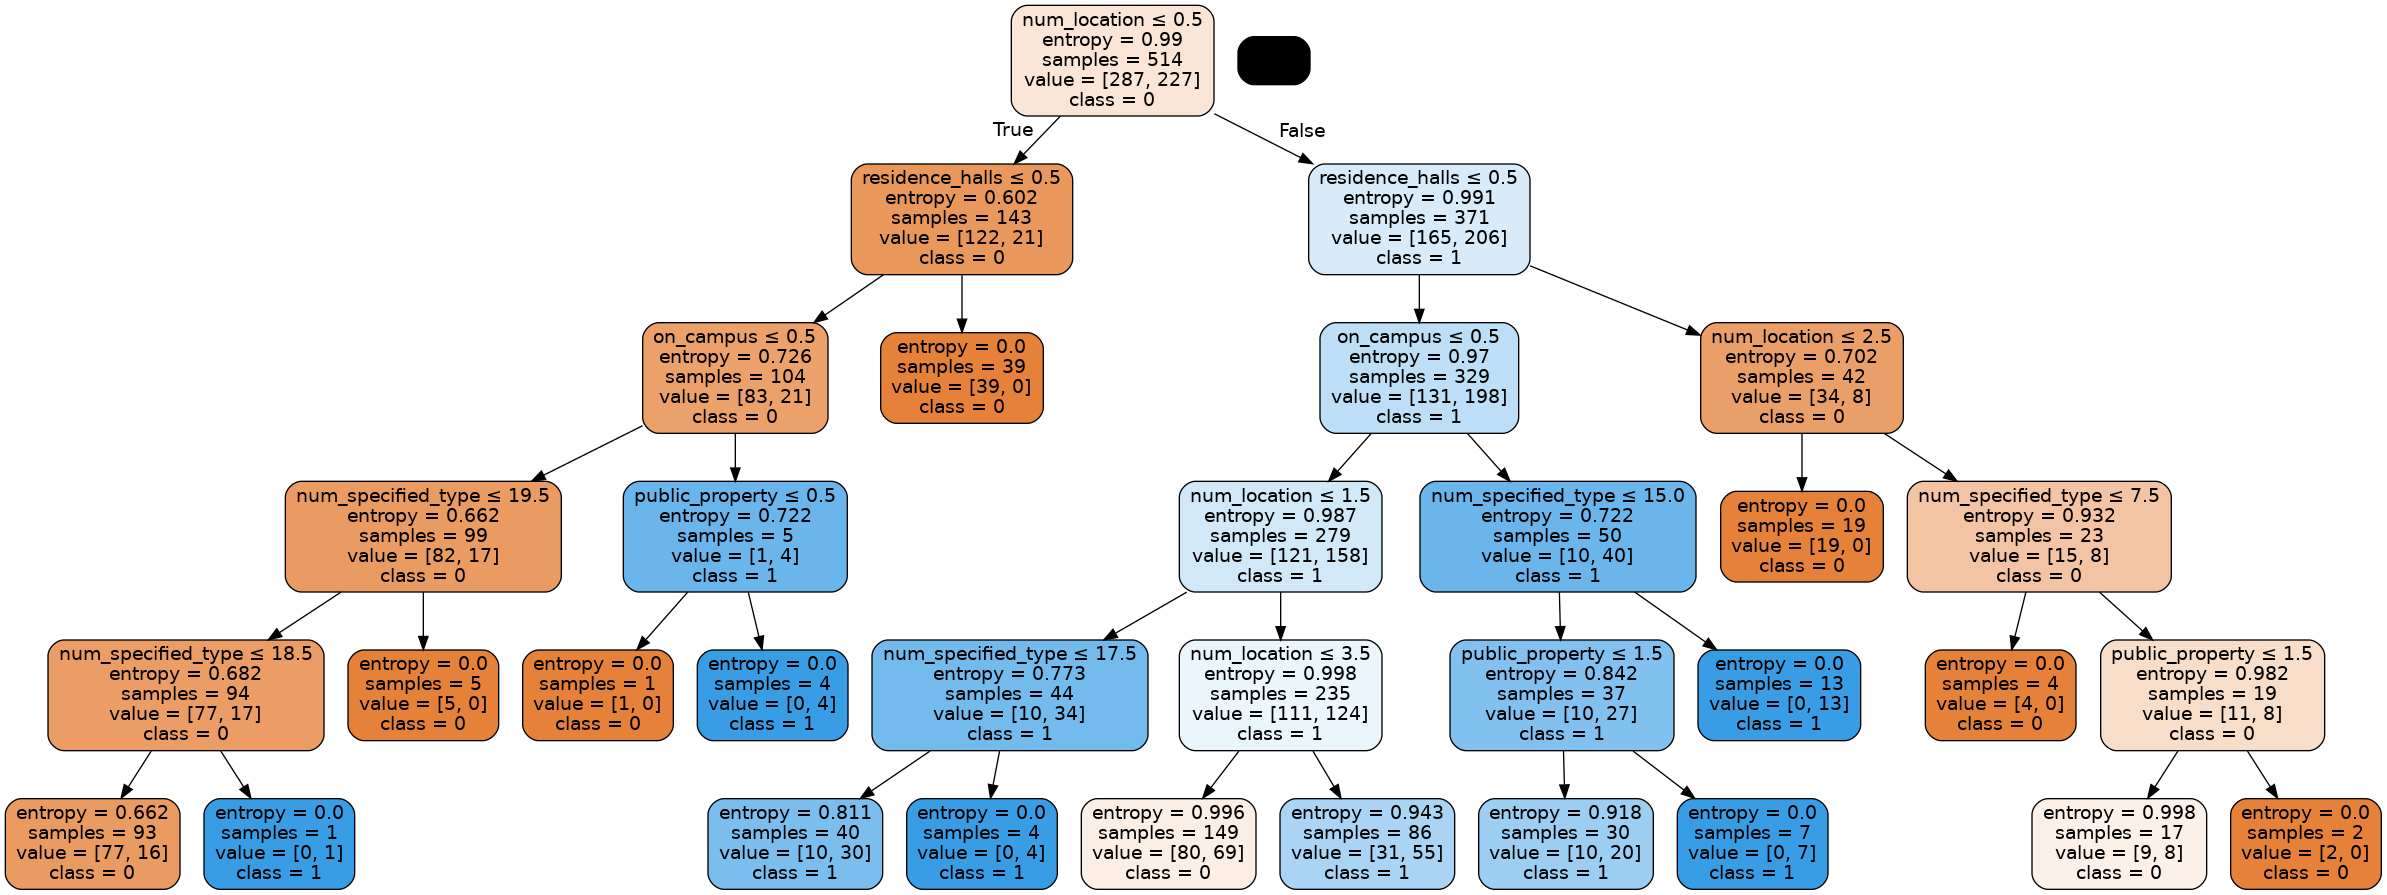

In [3]:
#Decision Tree #2 Entropy Model 
#Feature selection: want a dependent variable and independent variable
features = ['num_location','num_specified_type','on_campus','residence_halls',
'noncampus_property','public_property']

X = df[features]
y = df.num_type_of_university #Target variable

#Split the data into training sets and test sets
#By cross_validation, we will do a 50 fold cross validation, so training 98% of the data
# and test on 2%.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02,
random_state=1)

model = DecisionTreeClassifier(criterion="entropy",max_depth = 5)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

#Print the confusion matrix so that we get a better understanding
conf_matrix = confusion_matrix(y_pred, y_test)
print(conf_matrix)

#Draw the decision Tree
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features,
class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('entropymodel.png')
Image(graph.create_png())

<p>The last model we designed was a K-Nearest Neighbor Model to try and take a different approach to classify the dataset. For this code, we plotted the testing accuracy and training accuracy. We explored the different number of neighbors as well as the cross-validation. The final model used 20-fold cross-validation and 4 neighbors so that the model would be robust to noise.</p>

Accuracy:  0.7777777777777778
[[13  1]
 [ 5  8]]


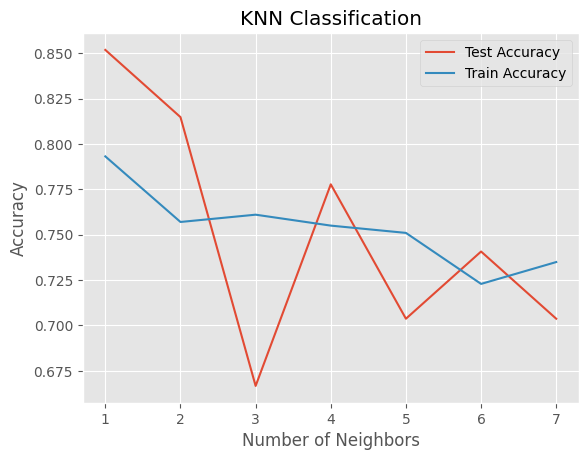

In [8]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

df = pd.read_csv("college_data.csv")

#x is the features and y is the target, for features we are using all numerical
#valued columns
x = df.drop('num_type_of_university',axis=1).values
y = df['num_type_of_university'].values

#20-fold cross-validation
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.05)

neighbors = np.arange(1,8)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)

    train_accuracy[i] = knn.score(x_train,y_train)
    test_accuracy[i] = knn.score(x_test,y_test)

plt.title('KNN Classification')
plt.plot(neighbors,test_accuracy,label='Test Accuracy')
plt.plot(neighbors,train_accuracy,label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig('knnmodel.png')
plt.show

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print("Accuracy: ",knn.score(x_test,y_test))

y_pred = knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))

###Results:
<p>The first decision tree built used the Gini value after each split to determine which features to split on. This method produces an accuracy value of 0.6364, with a confusion matrix (that was shown above). The 2-by-2 matrix produce as precision value of 0.8571, a recall value of 0.6667, and an f-measure value of 0.75. The number of decision leaves is a lot more in comparison to the second decision tree model we produced.</p>

<p>The second decision tree build used the entropy values after each split to determine what features were best to split on. The below decision tree was then produced via Python. There are much fewer decision leaves in this model, which allows for more samples to be accounted for in each lead node and hopefully solve the problem of overfitting. The decision tree produces an accuracy value of 0.8182, with the confusion matrix (which was shown above). This 2-by-2 matrix produces both a precision value and a recall value of 0.8571, and an f-measure value of 0.8571.</p>

<p>The third model uses the K-Nearest Neighbor Algorithm for classification. It produces an accuracy value of 0.8148 (in one of the instances ran), with a confusion matrix shown above. The 2-by-2 matrix produces a precision value of 0.7895, a recall value of 0.9375, and an f-measure value of 0.8571.</p>

<p>Based on the metrics of all three models, it appears the decision tree model that used entropy to determine its splits was the most effective in correctly classifying the data.</p>

###Conclusion:
<p>After collecting and organizing a dataset on the crime statistics throughout the different New York City schools, the objective of this project was to build multiple models to classify the variable of public school versus private school. The first model built was a decision tree that split on features that produced the lowest Gini value after the split; this led to a model with an accuracy rate of 0.6364. The second model built was a decision tree that split on features that produced the lowest entropy value after the split; this led to a model with an accuracy rate of 0.8182. The third model built was the KNN model that used the nearest neighbor algorithm; this led to a model with an accuracy rate of 0.8148. Because the classes are farily balanced in this dataset, the accuracy metric alone can be utilized to determine which model was most effective and accurate. However, even taking into account the precision, recall, and f-measure values, the entropy model still appears to be the best as it has higher precision that the KNN model, and a higher recall value than the Gini model. The KNN model was almost as effective as the entropy model, but the Gini model appeared to be the least effective in classifying the attribute.</p>

<p>There is stil much to learn froom this dataset. In the future, we would like to continue exploring these models and hopefully create more decision tree models that we can combine through a random forest algorithm and explore whether that is a better approach for this dataset. There were also other aspects of data we wanted to explore, such as whether or not we can predict the type of university or type of borough from the types of incidents reported.</p>

###Links to the Datasets:
Fordham University
https://www.fordham.edu/download/downloads/id/3161/annual_security_and_fire_safety_report.pdf 

Baruch College
https://adminfinance.baruch.cuny.edu/wp-content/uploads/sites/25/2020/12/2020-Annual-Security-Report.pdf 

Queens College
https://www.qc.cuny.edu/about/security/Documents/2020%20ASR%20Campus%20Final.pdf 

St. John’s 
https://www.stjohns.edu/sites/default/files/uploads/2020_Annual_Security_and_Fire_Safety_Report.pdf 

LaGuardia Community College
https://www.laguardia.edu/uploadedfiles/main_site/content/divisions/administration/emergency_info/clery-report.pdf 

Columbia University
https://publicsafety.columbia.edu/sites/default/files/content/SecurityReport2020.pdf 

NYU
https://www.nyu.edu/content/dam/nyu/publicSafety/documents/NYU-NEWYORK-ASR-20.pdf 


Pace University
https://www.pace.edu/sites/default/files/files/security-emergency-management/fire-safety-security-report/2020-annual-fire-safety-security-report.pdf 

NYIT
https://www.nyit.edu/files/policies/AnnualSafetyFireReport.pdf 

Brooklyn College
http://www.brooklyn.cuny.edu/web/off_safety/Annual_Security_Report-2020.pdf 


Pratt
https://www.pratt.edu/the-institute/public-safety/security-reports/ 
file:///C:/Users/eyih2/Downloads/2020-clery_act_report-_final_document_-_pdf_(1).pdf 

LIU
https://www.liu.edu/riverhead/studserv/~/media/A80BA84ECC7F4551A70C9A25BCAD32E0.ashx 

Kingsborough Community 
https://www.kbcc.cuny.edu/campus_security/documents/2020-KBCC-ANNUAL-SECURITY-REPORT-2020.pdf 

Lehman
https://lehman.edu/public-safety/documents/2020/2020AnnualSecurityReport-Final.pdf 

Bronx Community College
http://www.bcc.cuny.edu/wp-content/uploads/2020/12/2020-bcc-annual-security-report.pdf 

Manhattan College
https://content.manhattan.edu/public-safety-files/annual-security-report.pdf 

College of Staten Island
https://www.csi.cuny.edu/sites/default/files/pdf/publicsafety/AnnualSecurityReport.pdf 

Wagner College
https://wagner.edu/public-safety/files/2020/12/Campus-Safety-and-Security-Annual-Report-2017-2019-FINAL-1.pdf 

NYC College of Tech
https://www.citytech.cuny.edu/public-safety/docs/studentrighttoknow.pdf 

York College
https://www.york.cuny.edu/public-safety/security-reports/view 

Plaza College
http://www.plazacollege.edu/wp-content/uploads/2020/10/Campus-Security-Report-2020.pdf 

Queensborough Community College
https://www.qcc.cuny.edu/publicsafety/docs/2020-QCC-ASR.pdf 